#  Lab 1



##  Hand-Written Digit Recognition

In [6]:
!pip install numpy
!pip install pandas
!pip install scikit-learn

import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>Import Digits Data</h1>

In [7]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

In [8]:
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


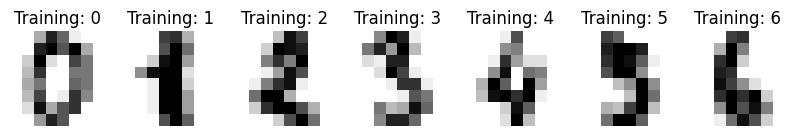

In [32]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [46]:
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

score = dummy.score(X_test, y_test)
print("Score on test data: {:.2f}".format(score))


Score on test data: 0.08


In [47]:
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    digits.data,
    digits.target,
    test_size=0.25,
    random_state=0
)

In [48]:
dummy_clf = (
    DummyClassifier(
        strategy="most_frequent",
        random_state=0
    )
    .fit(X_train, y_train)
)

In [49]:
unique, counts = np.unique(y_train, return_counts=True)
value_counts = np.asarray((unique, counts)).T 
value_counts[value_counts[:, 1].argsort()]

array([[  8, 126],
       [  6, 129],
       [  7, 131],
       [  2, 133],
       [  9, 133],
       [  5, 134],
       [  3, 138],
       [  1, 139],
       [  0, 141],
       [  4, 143]], dtype=int64)

Prediction = [4]


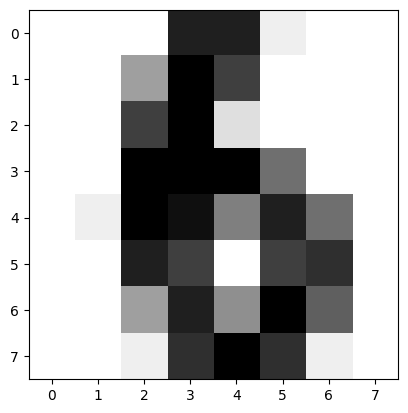

In [50]:
def plot_predict(clf : object, _instance : np.array):
    print("Prediction =", clf.predict(_instance))
    plt.imshow(_instance.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest")

plot_predict(
    dummy_clf,
    X_train[np.random.randint(X_train.shape[0], size=1), :]
)

In [51]:
print(
    metrics.classification_report(
        y_test,
        dummy_clf.predict(X_test),
        zero_division=0
    )
)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        45
           4       0.08      1.00      0.16        38
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        47

    accuracy                           0.08       450
   macro avg       0.01      0.10      0.02       450
weighted avg       0.01      0.08      0.01       450



<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

### answer from GPT

In [52]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
score = logistic_regression.score(X_test, y_test)

print("Score on test data: {:.2f}".format(score))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Score on test data: 0.96

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.92      0.92        52
           2       0.98      0.94      0.96        53
           3       0.95      0.98      0.96        54
           4       0.98      0.98      0.98        48
           5       0.98      0.95      0.96        57
           6       0.95      0.98      0.97        60
           7       0.98      0.96      0.97        53
           8       0.92      0.89      0.90        61
           9       0.92      0.96      0.94        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



### answer from host

In [55]:
preds = LogisticRegression(
    random_state=0,
    max_iter=10_000,
    multi_class="auto"
).fit(X_train, y_train).predict(X_test)

In [56]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.92      0.92        52
           2       0.98      0.94      0.96        53
           3       0.95      0.98      0.96        54
           4       0.98      0.98      0.98        48
           5       0.98      0.95      0.96        57
           6       0.95      0.98      0.97        60
           7       0.98      0.96      0.97        53
           8       0.92      0.89      0.90        61
           9       0.92      0.96      0.94        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [57]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

# Split into train-val-test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=0)


<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

### From ChatGPT

Score on test data: 0.96


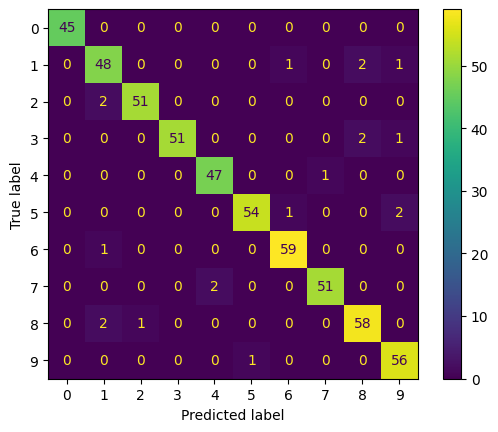

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.91      0.92      0.91        52
           2       0.98      0.96      0.97        53
           3       1.00      0.94      0.97        54
           4       0.96      0.98      0.97        48
           5       0.98      0.95      0.96        57
           6       0.97      0.98      0.98        60
           7       0.98      0.96      0.97        53
           8       0.94      0.95      0.94        61
           9       0.93      0.98      0.96        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [58]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Generate a range of values for C
Cs = np.logspace(-3, 0, 4)
best_C = None
best_score = 0

for C in Cs:
    logistic = LogisticRegression(C=C, random_state=0, multi_class="auto", max_iter=10_000)
    logistic.fit(X_train, y_train)
    
    score = logistic.score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_C = C
        
# Train the model with the best hyperparameter on combined train and val data
logistic = LogisticRegression(C=best_C, random_state=0, multi_class="auto", max_iter=10_000)
logistic.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

# Make predictions on the test data
y_pred = logistic.predict(X_test)

# Calculate and print the score on test data
test_score = logistic.score(X_test, y_test)
print("Score on test data: {:.2f}".format(test_score))

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=range(10))
display.plot()
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))


### From Lecture

In [ ]:
train accs, val_accs, c_ = [], [], []

for i in(10**-1_ for i_ in  range(4)):
    lr_clf = LogisticRegression(C=i, max_iter=10000). fit(X_train, y_train) 

    

<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the digits data
digits = load_digits()

# Split the data into train, val, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.3, random_state=0)

# Initialize a list to store the accuracy scores for each value of max_depth
accuracy_scores = []

# Try values of 1 through 20 for max_depth
for max_depth in range(1, 21):
    # Train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = clf.predict(X_val)
    
    # Calculate the accuracy score on the validation data
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Find the value of max_depth with the highest accuracy score
best_max_depth = np.argmax(accuracy_scores) + 1

# Train the final decision tree classifier on the combined train and val data
final_clf = DecisionTreeClassifier(max_depth=best_max_depth)
final_clf.fit(X_trainval, y_trainval)

# Predict on the test data
y_pred = final_clf.predict(X_test)

# Calculate the accuracy score on the test data
final_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: {:.2f}".format(final_accuracy))



Accuracy on test data: 0.85


In [66]:
import matplotlib.pyplot as plt

# Get the train and validation accuracy for different values of max_depth
train_accuracy = []
val_accuracy = []
max_depths = range(1, 21)

for max_depth in max_depths:
    clf = DecisionTreeClassifier


<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.